In [615]:
# importando biblioteca
import pandas as pd
import matplotlib.pyplot as plt

In [616]:
# realizando a leitura dos arquivos
df0 = pd.read_excel(r'./datasets/Aracaju.xlsx')
df1 = pd.read_excel(r'./datasets/Fortaleza.xlsx')
df2 = pd.read_excel(r'./datasets/Natal.xlsx')
df3 = pd.read_excel(r'./datasets/Recife.xlsx')
df4 = pd.read_excel(r'./datasets/Salvador.xlsx')

In [617]:
# juntando todos os arquivos
dframe = pd.concat([df0, df1, df2, df3, df4])

In [618]:
# lendo as 5 primeiras linhas do arquivo
dframe.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [619]:
# verificando os tipos de dados do dataset
dframe.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [620]:
# convertendo oo tipo de dado da coluna Vendas para object
dframe.LojaID = dframe.LojaID.astype('object')

In [621]:
# verificando a quantidade de valores nulos
dframe.isnull().sum()

Cidade    0
Data      0
Vendas    7
LojaID    0
Qtde      0
dtype: int64

In [622]:
# substituindo valores nulos pela média de vendas
dframe.Vendas.fillna(dframe.Vendas.mean(), inplace=True)

In [623]:
# verificando a quantidade de valores nulos
dframe.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [624]:
# pegando uma amostra de 5 linhas do dataset
dframe.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
116,Aracaju,2018-01-01,48.44,1522,4
119,Natal,2019-01-02,136.37,1034,2
138,Recife,2019-03-02,150.38,983,6
110,Recife,2019-03-02,51.98,983,6
42,Fortaleza,2019-01-01,38.71,1004,5


In [625]:
# substituindo valores nulos por zero
dframe.Vendas.fillna(0, inplace=True)

In [626]:
# criando coluna de receita
dframe['Receita'] = dframe.Vendas.mul(dframe.Qtde)

In [627]:
dframe.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [628]:
# caso não tenhamos a quantidade
dframe['Quantidade'] = dframe.Receita / dframe.Vendas

In [629]:
dframe.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Quantidade
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [630]:
# maior receita
dframe.Receita.max()

3544.0

In [631]:
# menor receita
dframe.Receita.min()

3.34

In [632]:
# média receita
dframe.Receita.mean()

388.83868706319737

In [633]:
# 3 maiores receitas
dframe.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Quantidade
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [634]:
# 3 menores receitas
dframe.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Quantidade
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [635]:
# maiores vendas por cidade
dframe.groupby('Cidade')['Receita'].sum().sort_values(ascending=False)

Cidade
Natal        167227.520000
Recife        52325.794735
Aracaju       49557.771499
Salvador      40596.730000
Fortaleza     37913.970000
Name: Receita, dtype: float64

# Trabalhando com datas

In [636]:
dframe.head(0)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Quantidade


In [637]:
# converter coluna para tipo de dados de int
dframe.Data = dframe.Data.astype('int64')

In [638]:
dframe.dtypes

Cidade         object
Data            int64
Vendas        float64
LojaID         object
Qtde            int64
Receita       float64
Quantidade    float64
dtype: object

In [639]:
# converter coluna para tipo de dados de Data
dframe.Data = pd.to_datetime(dframe.Data)

In [640]:
dframe.dtypes

Cidade                object
Data          datetime64[ns]
Vendas               float64
LojaID                object
Qtde                   int64
Receita              float64
Quantidade           float64
dtype: object

In [641]:
soma_ano = dframe.Data.dt.year

In [642]:
# agrupar soma da receita por ano
dframe.groupby(soma_ano)['Receita'].sum()

Data
2018    118986.051499
2019    228635.734735
Name: Receita, dtype: float64

In [643]:
# criando coluna Ano_Venda
dframe['Ano_Venda'] = dframe.Data.dt.year

In [644]:
dframe.head(0)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Quantidade,Ano_Venda


In [645]:
# extraindo o mês e o dia
dframe['Mes'], dframe['Dia'] = dframe.Data.dt.month, dframe.Data.dt.day

In [646]:
# 
dframe.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Quantidade,Ano_Venda,Mes,Dia
76,Recife,2019-01-01,17.86,980,5,89.30,5.0,2019,1,1
47,Aracaju,2018-01-01,80.46,1520,2,160.92,2.0,2018,1,1
55,Aracaju,2018-01-01,67.23,1520,8,537.84,8.0,2018,1,1
128,Aracaju,2018-01-01,37.49,1521,2,74.98,2.0,2018,1,1
70,Recife,2019-01-01,20.40,983,7,142.80,7.0,2019,1,1


In [647]:
# data minima
dframe.Data.min()

Timestamp('2018-01-01 00:00:00')

In [648]:
# separando os trimestres
primeiro_tri_2019 = dframe.loc[(dframe.Data.dt.year == 2019) & (dframe.Data.dt.month <= 3)]
segundo_tri_2019 = dframe.loc[(dframe.Data.dt.year == 2019) & ((dframe.Data.dt.month > 3) & (dframe.Data.dt.month <= 6))]
terceiro_tri_2019 = dframe.loc[(dframe.Data.dt.year == 2019) & ((dframe.Data.dt.month > 6) & (dframe.Data.dt.month <= 9))]
quarto_tri_2019 = dframe.loc[(dframe.Data.dt.year == 2019) & ((dframe.Data.dt.month > 9) & (dframe.Data.dt.month <= 12))]

In [649]:
# filtrando as vendas do mes de março
ano = dframe.Data.dt.year == 2019
mes = dframe.Data.dt.month == 3
mes_março = dframe.loc[ano & mes]

# Visualização de Dados

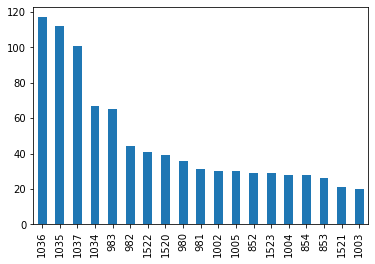

In [650]:
# quantidade de venda por loja em barra vertical
dframe['LojaID'].value_counts(ascending=False).plot.bar();

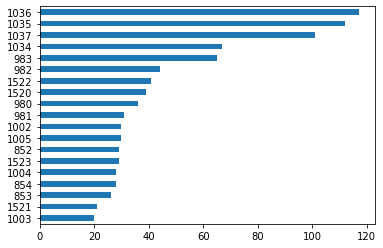

In [651]:
# quantidade de venda por loja em barra horizontal
dframe['LojaID'].value_counts(ascending=True).plot.barh()
plt.savefig('qtde_venda.png');

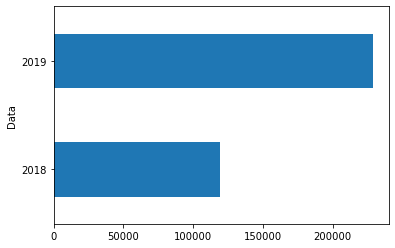

In [652]:
# agrupar receita por cada ano
dframe.groupby(dframe.Data.dt.year)['Receita'].sum().plot.barh()
plt.savefig('receita_ano.png');

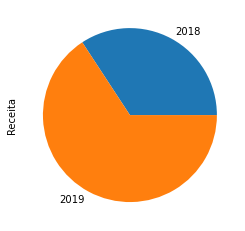

In [653]:
# agrupar receita por cada ano grafico de pizza
dframe.groupby(dframe.Data.dt.year)['Receita'].sum().plot.pie()
plt.savefig('receita_ano_graf_pizza.png');

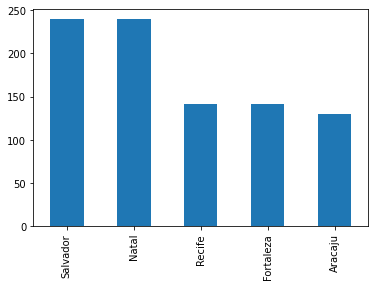

In [654]:
#total de vendas por cidade
dframe.Cidade.value_counts().plot.bar()
plt.savefig('venda_por_cidade.png');

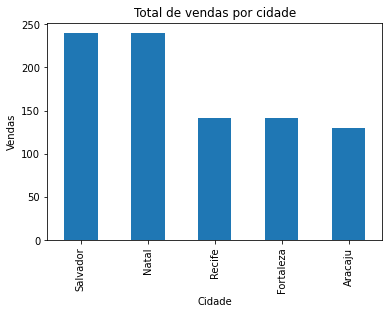

In [655]:
# detalhando o gráfico
dframe.Cidade.value_counts().plot.bar(title='Total de vendas por cidade');
plt.xlabel('Cidade')
plt.ylabel('Vendas');

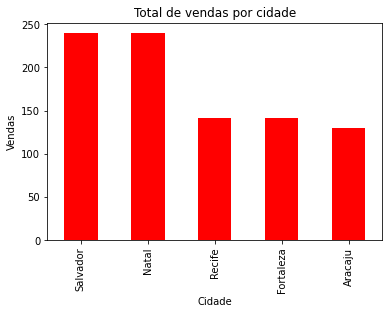

In [656]:
# detalhando o gráfico
dframe.Cidade.value_counts().plot.bar(title='Total de vendas por cidade', color='red');
plt.xlabel('Cidade')
plt.ylabel('Vendas');

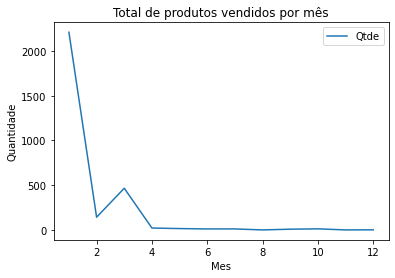

In [657]:
dframe.groupby(dframe.Mes)['Qtde'].sum().plot(title='Total de produtos vendidos por mês')
plt.xlabel('Mes')
plt.ylabel('Quantidade')
plt.legend()
plt.savefig('total_venda_por_mes.png');

In [658]:
dframe.head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Quantidade,Ano_Venda,Mes,Dia
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1


In [659]:
dframe_2019 = dframe[dframe['Ano_Venda'] == 2019]

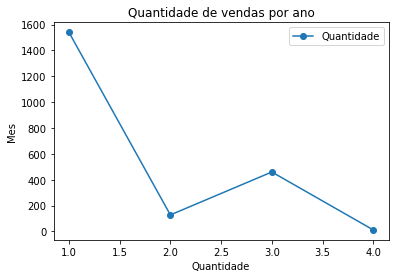

In [660]:
dframe_2019.groupby(dframe_2019['Mes'])['Quantidade'].sum().plot(title='Quantidade de vendas por ano', marker= 'o')
plt.xlabel('Quantidade')
plt.ylabel('Mes')
plt.legend()
plt.savefig('qtde_vendas_por_ano.png');

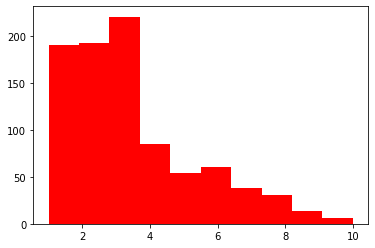

In [661]:
plt.hist(dframe.Qtde, color='red')
plt.savefig('qtde_vendas_por_ano_histograma.png');